<b><font size="6">Decision Tree Regression|Multi-Feature Salary Prediction </font></b>

* **Author**: Nthabiseng Seloana

**The Problem:** 
An organization has data regarding their employees' years of experience, job title, age, gender and education. The aim is to build a model that will predict the salary of a new employee based on the variables listed.ser

### Importing Libraries

+ Basic manipulation and processing:
  * numpy
  * pandas
  * IPython.display  - used to provide a better display of the pandas DataFrames
+ Data Visualization:
  * matplotlib
  * seaborn
+ Machine learning methods that will be utilized from the sklearn library:
  * sklearn.linear_model for Linear Regression
  * sklearn.tree for Decision Tree Regression
  * sklearn.model_selection for Train Test Splitting
  * sklearn.metrics for Metrics scores (Mean Absolute Error, Mean Squared Error and R^2)

In [130]:
import numpy as np 
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [43]:
df=pd.read_csv('Salary Data.csv')

In [44]:
display(df.head(10))

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [45]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Age,373.0,37.431635,7.069073,23.0,31.0,36.0,44.0,53.0
Years of Experience,373.0,10.030831,6.557007,0.0,4.0,9.0,15.0,25.0
Salary,373.0,100577.345845,48240.013482,350.0,55000.0,95000.0,140000.0,250000.0


In [46]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


None

From analysing the datatypes found in the dataset, there are variables that have quantitative values and othr variables that have categorical values. 

In [48]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [49]:
df["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', nan], dtype=object)

In [50]:
len(df["Job Title"].unique())

175

The number of job titles are actually repeated concluding that they would likely produce innaccuracy to the data.

### Removing the Job Title feature

In [53]:
df.drop("Job Title", axis =1, inplace=True)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Years of Experience  373 non-null    float64
 4   Salary               373 non-null    float64
dtypes: float64(3), object(2)
memory usage: 14.8+ KB


None

### Identifying any null values

In [55]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Years of Experience    2
Salary                 2
dtype: int64

Removing null values:
After the null values were identified, these two rows shall be removed from the dataset.

In [58]:
df.dropna(inplace=True)
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Years of Experience    0
Salary                 0
dtype: int64

### Detecting duplicates

In [60]:
df.duplicated().sum()

99

Although the distribution may be skewed from the number of duplicates identified in the dataset (they are derived from the 'Job Title' column) they actually hold value, so removing them this time around would actually impact the otucome of the model once built.

### Encoding

The categorical values will be changed into numerical values.

In [68]:
df["Education Level"].unique().tolist()

["Bachelor's", "Master's", 'PhD']

In [70]:
education_mapping = {"Bachelor's" : 1, 
           "Master's"   : 2, 
           'PhD'        : 3
          }
gender_mapping = {"Male": 0, "Female" : 1}

education_level = {v: k for k, v in education_mapping.items()}
gender = {v: k for k, v in gender_mapping.items()}

df["Education"] = df["Education Level"].map(education_mapping)
df["Gender"] = df["Gender"].map(gender_mapping)
df.drop('Education Level', axis=1, inplace = True)

# Move 'Salary' column to the last position
salary = df.pop('Salary')
df['Salary'] = salary
display(df.head())

,Age,Gender,Years of Experience,Education,Salary
0,32.0,0,5.0,1,90000.0
1,28.0,1,3.0,2,65000.0
2,45.0,0,15.0,3,150000.0
3,36.0,1,7.0,1,60000.0
4,52.0,0,20.0,2,200000.0


### Visualization: Plotting Histograms and Pairplots:
To analyse the distributions of each variable, histograms will be used. A correlation analysis is done using a pairplot, which both are from the seaborn library.

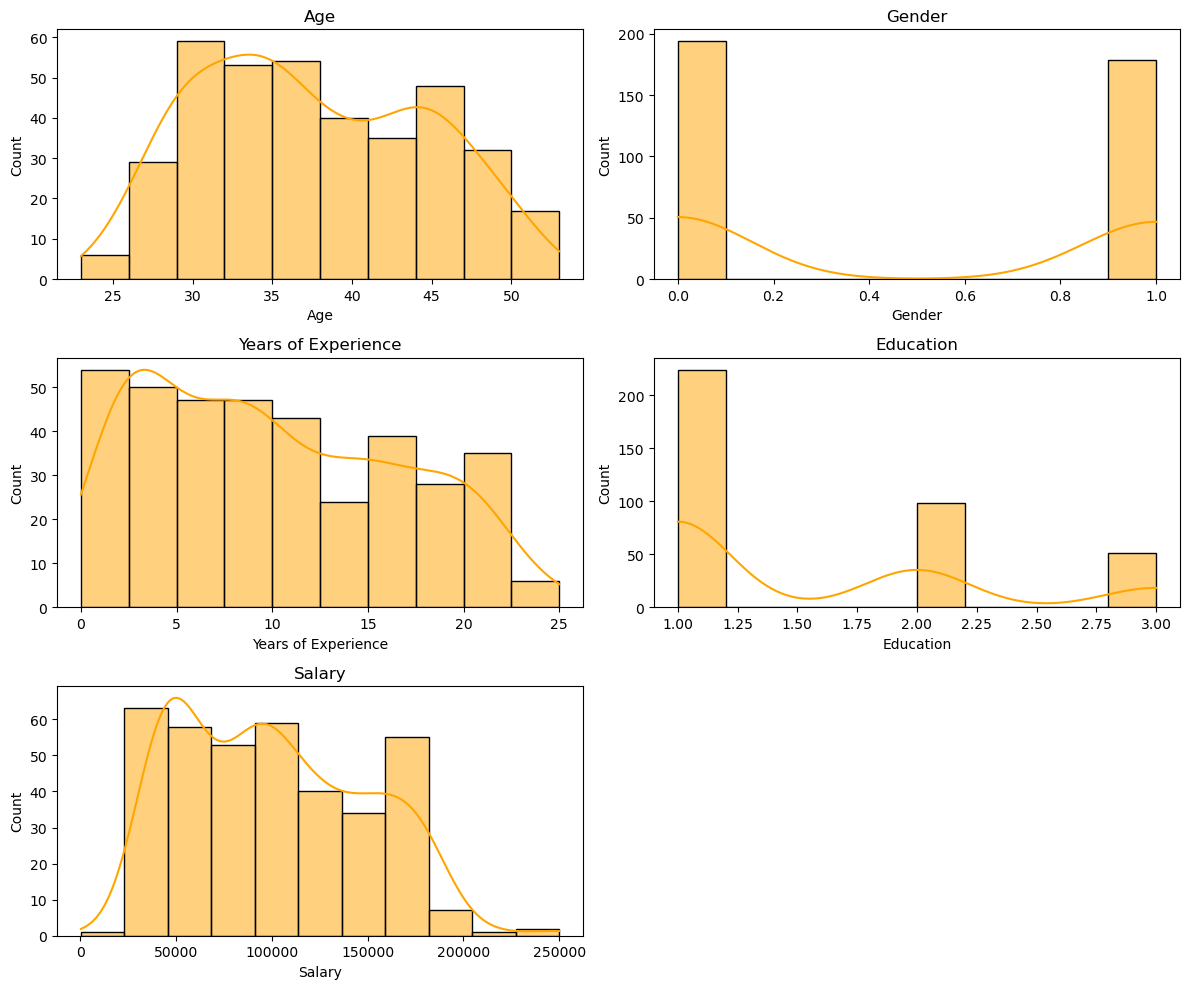

In [122]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], kde=True, color='orange')
    plt.title(col)
plt.tight_layout()
plt.show()

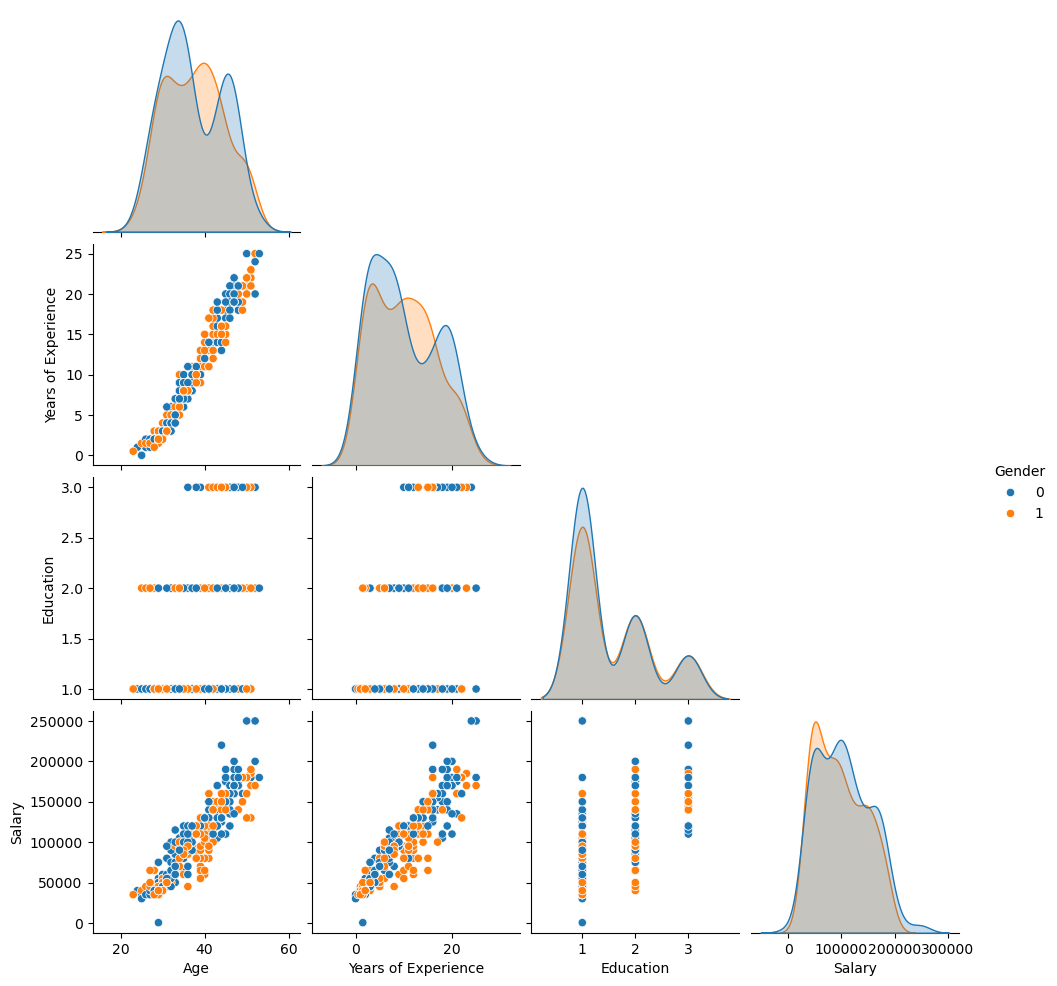

In [73]:
_ = sns.pairplot(df, hue="Gender", corner=True)

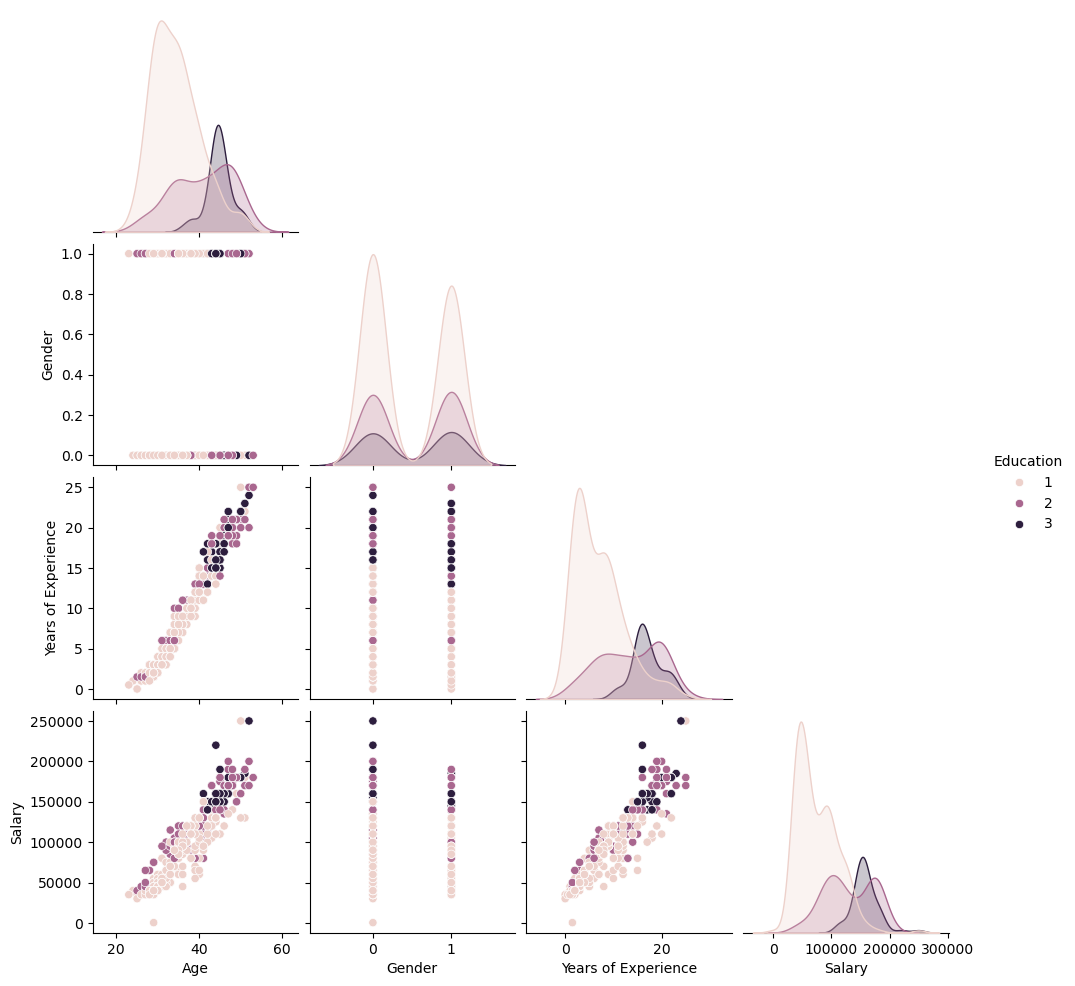

In [74]:
_ = sns.pairplot(df, hue="Education", corner=True)

<Axes: >

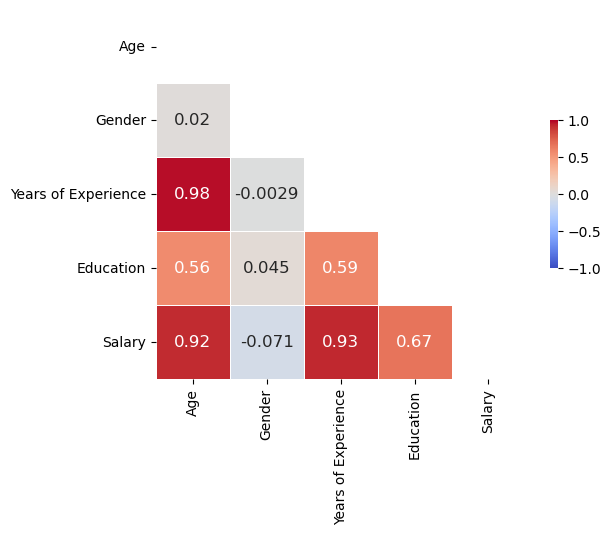

In [125]:
df.corr()
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(),
            square = True,
            linewidths = .5,
            cmap = 'coolwarm',
            cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},
            vmin = -1, 
            vmax = 1,
            annot = True,
            annot_kws = {'size': 12}, 
            mask = mask
           )

The visuals have provided insight to the strong correlation that the variables have. The increase in the years of experience, the higher the salary.

### Feature Selection:
Selecting a feature to become an output variable.

In [78]:
output_var = "Salary"
X = df.drop(columns = ["Salary"])
y = df["Salary"]
display(X.head(), y.head())

,Age,Gender,Years of Experience,Education
0,32.0,0,5.0,1
1,28.0,1,3.0,2
2,45.0,0,15.0,3
3,36.0,1,7.0,1
4,52.0,0,20.0,2


0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64

## Builiding the Model

### Splitting the training and testing data

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

### Training the models

In [83]:
model_linreg = LinearRegression().fit(X, y)
model_dtree  = DecisionTreeRegressor(random_state=0).fit(X, y)

In [84]:
y_train_pred_linreg = model_linreg.predict(X_train)
y_test_pred_linreg  = model_linreg.predict(X_test)

y_train_pred_dtree = model_dtree.predict(X_train)
y_test_pred_dtree  = model_dtree.predict(X_test)

## Evaluation

## Comparing the predicted and the actual data

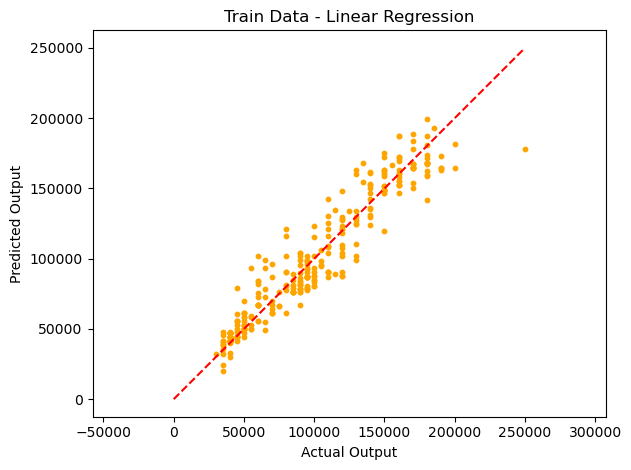

In [116]:
plt.scatter(y_train, y_train_pred_linreg, s=10, color = 'orange')
plt.plot([0, y_train.max()], [0, y_train.max()], color = 'red', linestyle='dashed')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.axis('equal')
plt.title('Train Data - Linear Regression')
plt.tight_layout()

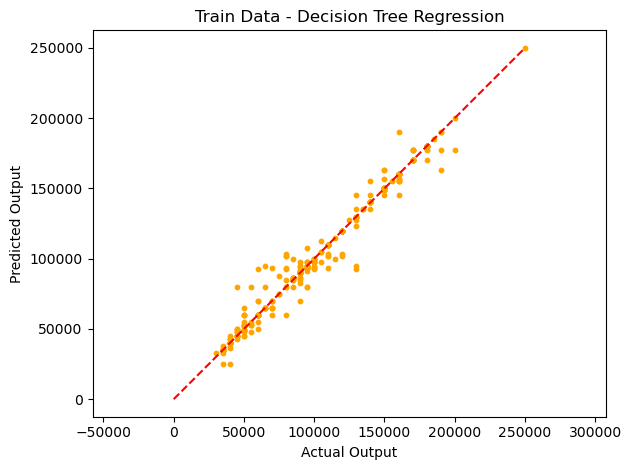

In [114]:
plt.scatter(y_train, y_train_pred_dtree, s=10, color = 'orange')
plt.plot([0, y_train.max()], [0, y_train.max()], color = 'red', linestyle='dashed')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.axis('equal')
plt.title('Train Data - Decision Tree Regression')
plt.tight_layout()

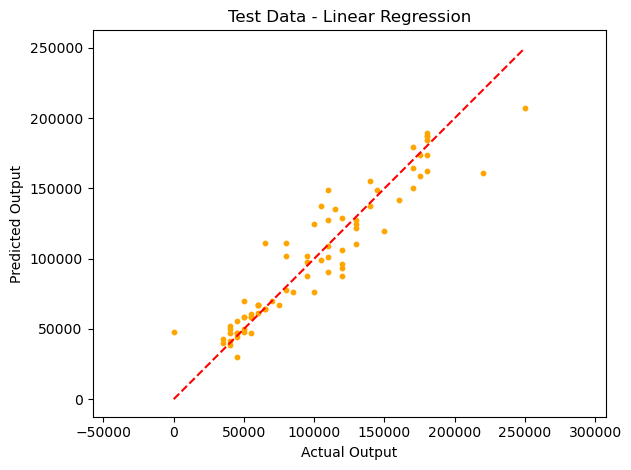

In [118]:
plt.scatter(y_test, y_test_pred_linreg, s=10, color = 'orange')
plt.plot([0, y_test.max()], [0, y_test.max()], color = 'red', linestyle='dashed')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.axis('equal')
plt.title('Test Data - Linear Regression')
plt.tight_layout()

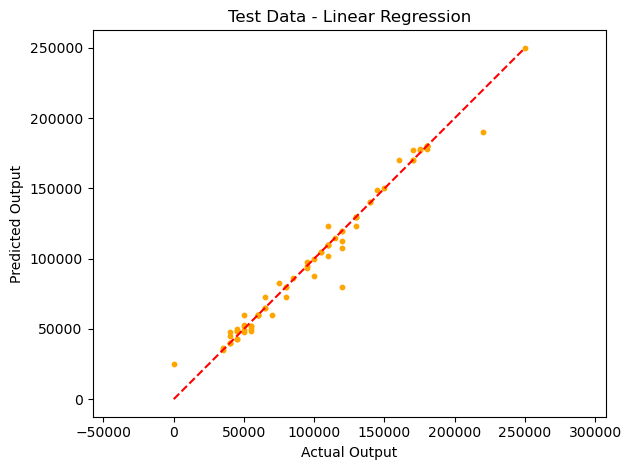

In [120]:
plt.scatter(y_test, y_test_pred_dtree, s=10, color = 'orange')
plt.plot([0, y_test.max()], [0, y_test.max()], color = 'red', linestyle='dashed')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.axis('equal')
plt.title('Test Data - Linear Regression')
plt.tight_layout()

## Regression Metrics

In [92]:
train_mse_linreg =  np.round(mean_squared_error(y_train, y_train_pred_linreg),3)
train_rmse_linreg =  int(np.round(np.sqrt(train_mse_linreg),0))

train_mse_dtree =  np.round(mean_squared_error(y_train, y_train_pred_dtree),3)
train_rmse_dtree =  int(np.round(np.sqrt(train_mse_dtree),0))

print('TRAINING DATA:')
print(f'Linear Regression RMSE        : ${train_rmse_linreg:,}')
print(f'Decision Tree Regression RMSE : ${train_rmse_dtree:,}')

TRAINING DATA:
Linear Regression RMSE        : $14,459
Decision Tree Regression RMSE : $7,857


In [93]:
test_mse_linreg =  np.round(mean_squared_error(y_test, y_test_pred_linreg),3)
test_rmse_linreg =  int(np.round(np.sqrt(test_mse_linreg),0))

test_mse_dtree =  np.round(mean_squared_error(y_test, y_test_pred_dtree),3)
test_rmse_dtree =  int(np.round(np.sqrt(test_mse_dtree),0))

print('TESTING DATA:')
print(f'Linear Regression RMSE        : ${test_rmse_linreg:,}')
print(f'Decision Tree Regression RMSE : ${test_rmse_dtree:,}')

TESTING DATA:
Linear Regression RMSE        : $17,865
Decision Tree Regression RMSE : $7,824


The Linear Regression RMSE outcome has a difference about approximately $2,000 whilst the Decision Tree Regression RMSE outcome, there was a reasonably small differenc between the values

## Predictions

In [95]:
X_train.columns

Index(['Age', 'Gender', 'Years of Experience', 'Education'], dtype='object')

In [96]:
X_new_dict = {"Age": 32, "Gender": 1,  "Years of Experience":10, "Education": 2}
X_new = pd.DataFrame.from_dict(X_new_dict, orient='index').T

y_pred_linreg = model_linreg.predict(X_new)
y_pred_dtree  = model_dtree.predict(X_new)

print('PREDICTION:')
print(f' - Age             : {X_new_dict["Age"]}')
print(f' - Gender          : {gender[X_new_dict["Gender"]]}')
print(f' - Experience      : {X_new_dict["Years of Experience"]}')
print(f' - Education       : {education_level[X_new_dict["Education"]]}')
print(f' - Salary (linreg) : ${np.round(y_pred_linreg[0]):,}')
print(f' - Salary (dtree)  : ${np.round(y_pred_dtree[0]):,}')

PREDICTION:
 - Age             : 32
 - Gender          : Female
 - Experience      : 10
 - Education       : Master's
 - Salary (linreg) : $87,429.0
 - Salary (dtree)  : $95,000.0
